# CamVid Visualisation
### Train

In [4]:
import tensorflow as tf
import numpy as np
import time
import os
import sys
import argparse


import SegNet as sn
import utils
import batch
import SegNetFlags
#os.environ["CUDA_VISIBLE_DEVICES"] = '1' ## <--- TO SELECT HPC GPU


#Reset
tf.reset_default_graph()
### DEFINING THE FLAGS ###
SegNetFlags.define_FLAGS()
FLAGS = tf.app.flags.FLAGS

### DEFINING THE PLACEHOLDERS ###
images_ph = tf.placeholder(tf.float32, [None, FLAGS.inputImX, FLAGS.inputImY, 3])
labels_ph= tf.placeholder(tf.int32, [None, FLAGS.inputImX, FLAGS.inputImY])
phase_ph = tf.placeholder(tf.bool, name='phase')

### BUILDING THE NETWORK ###
segnet = sn.SegNet(im_rgb = images_ph, phase=phase_ph)

### LOAD DATASET ###
batch = batch.batch()

saver = tf.train.Saver()
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
    utils.show_comparison("Train", saver, sess, batch, segnet, images_ph, labels_ph, phase_ph)

npy file loaded
build SegNet started
build SegNet finished: 13s
build batch finished: 18s
train size:  367   test size:  233
running the train loop
INFO:tensorflow:Restoring parameters from ./CAMVIDModels/model.ckpt-105


InvalidArgumentError: No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: pool1/pool1 = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="SAME", strides=[1, 2, 2, 1]](conv1_2/Relu)]]

Caused by op 'pool1/pool1', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-b198a7a32870>", line 24, in <module>
    segnet = sn.SegNet(im_rgb = images_ph, phase=phase_ph)
  File "/Users/harold/Documents/EPL/ERASMUS/Deep Learning/DTUSegnet/SegNet.py", line 43, in __init__
    self.pool1, self.argmax1 = layers.max_pool(self.convE1_2, 'pool1')
  File "/Users/harold/Documents/EPL/ERASMUS/Deep Learning/DTUSegnet/layers.py", line 18, in max_pool
    layer, argmax = tf.nn.max_pool_with_argmax(input_layer, ksize, strides=[1, 2, 2, 1], padding='SAME', name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 1898, in max_pool_with_argmax
    Targmax=Targmax, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'MaxPoolWithArgmax' with these attrs.  Registered devices: [CPU], Registered kernels:
  <no registered kernels>

	 [[Node: pool1/pool1 = MaxPoolWithArgmax[T=DT_FLOAT, Targmax=DT_INT64, ksize=[1, 2, 2, 1], padding="SAME", strides=[1, 2, 2, 1]](conv1_2/Relu)]]


### Test

In [3]:
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
    utils.show_comparison("Test", saver, sess, batch, segnet, images_ph, labels_ph, phase_ph)

NameError: name 'segnet' is not defined

### Validation

INFO:tensorflow:Restoring parameters from ./CAMVIDModels/model.ckpt-105


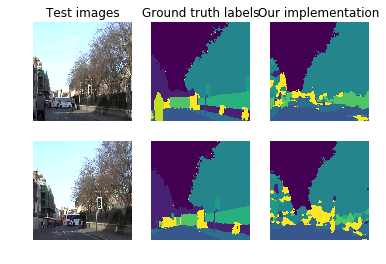

In [4]:
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
    utils.show_comparison("Validation", saver, sess, batch, segnet, images_ph, labels_ph, phase_ph)

# SUNRGBD Visualisation
### Train and Test without depth


In [ ]:
import tensorflow as tf
import numpy as np
import time
import os
import sys
import argparse

import SegNet as sn
import utils
import batch
import SegNetFlags
#os.environ["CUDA_VISIBLE_DEVICES"] = '1' ## <--- TO SELECT HPC GPU

### SUNRGBD ### 

#Reset
tf.reset_default_graph()
### DEFINING THE FLAGS ###
SegNetFlags.define_FLAGS(False,False,False)
FLAGS = tf.app.flags.FLAGS

### DEFINING THE PLACEHOLDERS ###
images_ph = tf.placeholder(tf.float32, [None, FLAGS.inputImX, FLAGS.inputImY, FLAGS.n_channels])
labels_ph= tf.placeholder(tf.int32, [None, FLAGS.inputImX, FLAGS.inputImY])
phase_ph = tf.placeholder(tf.bool, name='phase')

### BUILDING THE NETWORK ###
segnet = sn.SegNet(im_rgb = images_ph, phase=phase_ph)
### LOAD DATASET ###
batch = batch.batch()

saver = tf.train.Saver()
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
    utils.show_comparison("Train", saver, sess, batch, segnet, images_ph, labels_ph, phase_ph)

with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
    utils.show_comparison("Test", saver, sess, batch, segnet, images_ph, labels_ph, phase_ph)

### Train and Test with depth

In [ ]:
import tensorflow as tf
import numpy as np
import time
import os
import sys
import argparse

import SegDepth as sd
import utils
import batch
import SegNetFlags
#os.environ["CUDA_VISIBLE_DEVICES"] = '1' ## <--- TO SELECT HPC GPU

### SUNRGBD ### 

#Reset
tf.reset_default_graph()
### DEFINING THE FLAGS ###
SegNetFlags.define_FLAGS(False,True,False)
FLAGS = tf.app.flags.FLAGS

### DEFINING THE PLACEHOLDERS ###
images_ph = tf.placeholder(tf.float32, [None, FLAGS.inputImX, FLAGS.inputImY, FLAGS.n_channels])
labels_ph= tf.placeholder(tf.int32, [None, FLAGS.inputImX, FLAGS.inputImY])
phase_ph = tf.placeholder(tf.bool, name='phase')

### BUILDING THE NETWORK ###
segnet = sd.SegNet(im_rgbd = images_ph, phase=phase_ph)
### LOAD DATASET ###
batch = batch.batch()

saver = tf.train.Saver()
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
    utils.show_comparison("Train", saver, sess, batch, segnet, images_ph, labels_ph, phase_ph)

with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.75)))) as sess:
    utils.show_comparison("Test", saver, sess, batch, segnet, images_ph, labels_ph, phase_ph)